# Importing of classes #

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib



# Data Exploration and Reading # 
The data is about predicting the price of the flight tickets. The data is given in the form of a csv file. The data is read using the pandas library. The data is then explored to get a better understanding of the data.

### Importing the dataset 

In [8]:
data = pd.read_csv('Data/Clean_Dataset.csv')
print(data)

        Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           

### Dataset cleaning
- Assumption:
     - The data set original data set is too big to be processed in a reasonable time.
     - Reduce the dataset into 5000 rows.

In [9]:
#Cleans the dataset to show only the columns that are needed
#Reduce the number of rows to 5000 from 300153
#index_col=0 removes the index column
new_data = pd.read_csv('Data/Clean_Dataset.csv', nrows=5000, index_col=0)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
 10  price             5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 468.8+ KB


#### Checking for Missing Data

In [10]:
new_data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#### Conclusion
There is no need to fill in missing data as there is no missing data.

#### Feature Selection for Data Cleaning
- Assumption:
     - The feature flight according to domain knowledge is not important.
     - Reason:
        - The flight number is not important as the flight number does not have any relation with the price of the flight.
    

In [47]:
print(new_data)

        airline source_city departure_time stops   arrival_time  \
0      SpiceJet       Delhi        Evening  zero          Night   
1      SpiceJet       Delhi  Early_Morning  zero        Morning   
2       AirAsia       Delhi  Early_Morning  zero  Early_Morning   
3       Vistara       Delhi        Morning  zero      Afternoon   
4       Vistara       Delhi        Morning  zero        Morning   
...         ...         ...            ...   ...            ...   
4995     Indigo       Delhi  Early_Morning   one        Evening   
4996    Vistara       Delhi      Afternoon   one      Afternoon   
4997  Air_India       Delhi      Afternoon   one        Evening   
4998  Air_India       Delhi  Early_Morning   one        Evening   
4999  Air_India       Delhi  Early_Morning   one        Morning   

     destination_city    class  duration  days_left  price  
0              Mumbai  Economy      2.17          1   5953  
1              Mumbai  Economy      2.33          1   5953  
2           

#### Conclusion
The feature flight is removed from the dataset.

### Data Cleaning Conclusion
To conclude, the dataset is cleaned and ready for further analysis.
The dataset needs to be reduced due to it being too big to process on my computer.
The dataset also needs to be reduced because of the fear of overfitting.
This is done by randomly selecting 5000 rows from the original dataset.
Hence, the dataset is reduced to 5000 rows.



## Data Exploration
The data exploration is done to get a better understanding of the data. The data is explored using the plotlib library. The data is explored using the following methods:
- Histogram
- Scatter plot
- Box plot


##### Scatter Plot of Price vs Days Left

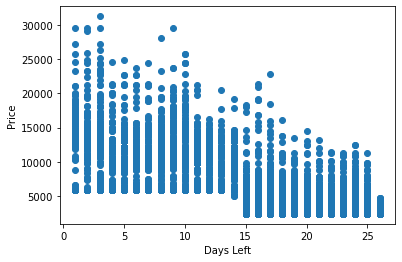

In [12]:
#Creates a new column called 'price' and sets it to the value of the 'price' column
plt.scatter(new_data['days_left'], new_data['price'])
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

### Scatter Plot Conclusion
Looking at the scatter plot, it is clear that the price of the flight ticket is related to the type of Airline. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Scatter Plot of Price vs Duration

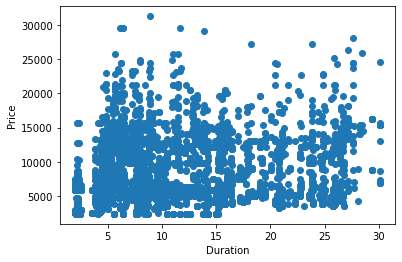

In [13]:
plt.scatter(new_data['duration'], new_data['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

#### Scatter Plot Conclusion
Through the scatter plot, it can be seen that there is a form of a gradient in the data. This means that the price of the ticket is related to the duration of the flight. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Histogram of Price

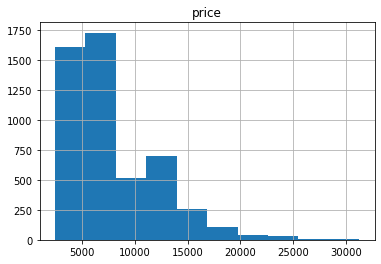

In [14]:
histogram = new_data.hist(column='price')

#### Histogram Conclusion
The histogram shows that there is a high frequency of the price of the ticket being between 0 and 10000. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Bar Graph of Airline Column

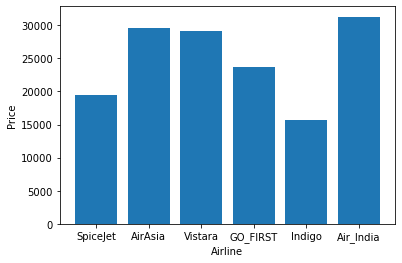

In [15]:
plt.bar(new_data['airline'], new_data['price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

#### Bar Graph Conclusion
The bar graph shows that Air_India has the highest price cost of the ticket. This could be due to the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Box Plot Grouped by Airline and Price

<AxesSubplot: title={'center': 'price'}, xlabel='airline'>

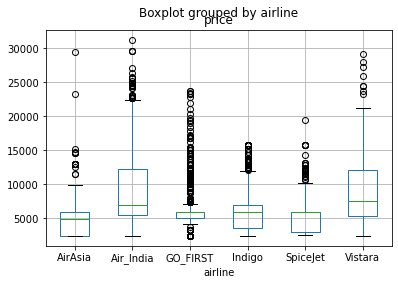

In [16]:
new_data.boxplot(column='price', by='airline')

#### Box Plot Conclusion
The box plot shows that the price of the ticket is related to the type of Airline. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.
> From the mean of the prices seen in the box plot, it can be seen that the airline Vistara has the highest cost of plane tickets

#### Multivariate Plot 

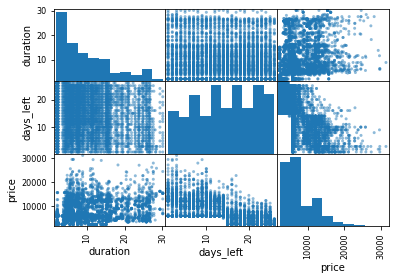

In [17]:
pd.plotting.scatter_matrix(new_data)
plt.show()

# Feature Engineering #
This feature engineering is before feature selection, so all features will be one hot encoded.\
The feature engineering is done to get a better understanding of the data and see which feature is needed.\
The feature engineering is done using the following methods:
- One Hot Encoding

### One-hot encoding of columns
- Assumption:
     - The columns Source, Destination, and Airline are categorical columns.
     - The columns Source, Destination, and Airline need to be converted into numerical columns.
     - The columns Source, Destination, and Airline are converted into numerical columns using one-hot encoding.

In [18]:
features_df = pd.get_dummies(new_data)
features_df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Delhi,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,1,1
1,2.33,1,5953,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,1
2,2.17,1,5956,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,1


Deleted the price column due to it being the column being predicted.

In [19]:
del features_df['price']
features_df.head()

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Delhi,departure_time_Afternoon,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Mumbai,class_Economy
0,2.17,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1,1
1,2.33,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,1
2,2.17,1,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,1
3,2.25,1,0,0,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,1
4,2.33,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,1


### Splitting the data into train and test data

Assumption:
The train_size of the code should be 70% of the code. This is to allow more data to be trained into the model.

In [20]:
#Splits the new data into training and testing sets
X = features_df.values
y = new_data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

#### Feature Engineering Conclusion
The reason for one hot encoding all the features is due to the fact that the model needs to be able to understand the data. The model needs to be able to understand the data by converting the categorical data into numerical data. This is done by one hot encoding the categorical data into numerical data. Afterwards, feature selection will be done after the data has gone through a gradient boosting regressor. This is to ensure that the data is not overfitting. 

### Grid Search
This is to find out which parameters would work best with the Gradient Boosting Regressor
 - Assumption:
     - The param_grids are set to test these fields for the hyper parameters of gradient boosting

In [21]:
from sklearn import ensemble
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['absolute_error', 'huber', 'squared_error']
}

# Create the model
model = ensemble.GradientBoostingRegressor()

# Define the grid search we want to run. Run it with all cpus in parallel.
hgs_cv = HalvingGridSearchCV(model, param_grid, n_jobs=-1, verbose=100)
hgs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(hgs_cv.best_params_)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 10
max_resources_: 3500
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 10
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 288
n_resources: 30
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 2
n_candidates: 96
n_resources: 90
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 270
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 810
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 2430
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 6, 'max_features': 0.1, 'min_samples_leaf': 9, 'n_estimators': 500}


# Feature Selection

### Gradient Boosting Regressor
This is to find out which parameters would work best with the Gradient Boosting Regressor
 - The Gradient Boosting Regressor is used to find out which features are important.
 - The hyper parameters are set to the best parameters found from the grid search.

In [43]:
model = ensemble.GradientBoostingRegressor(learning_rate=0.1, loss='squared_error', max_depth=6, max_features=0.1, min_samples_leaf=9, n_estimators=5000)
model.fit(X_train, y_train)
joblib.dump(model, 'Model/flight_price_model_gradient.pkl')

['Model/flight_price_model_gradient.pkl']

#### Choosing the best features from the Gradient Boosting Regressor
Any features that are under 0.1 are removed from the dataset.

In [41]:
model = joblib.load('Model/flight_price_model_gradient.pkl')
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(features_df.columns[index], (importance[index] * 100.0)))

class_Economy - 0.00%
destination_city_Mumbai - 0.00%
source_city_Delhi - 0.00%
departure_time_Late_Night - 0.01%
stops_two_or_more - 0.29%
arrival_time_Late_Night - 0.30%
departure_time_Night - 0.47%
arrival_time_Afternoon - 0.52%
arrival_time_Morning - 0.52%
airline_SpiceJet - 0.55%
arrival_time_Night - 0.57%
departure_time_Early_Morning - 0.65%
departure_time_Afternoon - 0.71%
arrival_time_Early_Morning - 0.79%
departure_time_Evening - 1.01%
departure_time_Morning - 1.03%
airline_GO_FIRST - 1.06%
arrival_time_Evening - 1.08%
airline_AirAsia - 1.26%
airline_Indigo - 1.31%
airline_Air_India - 2.60%
airline_Vistara - 2.66%
stops_one - 7.77%
stops_zero - 8.18%
duration - 13.51%
days_left - 53.14%


#### Feature Selection Conclusion
The reason for choosing the best features from the Gradient Boosting Regressor is due to the fact that the model needs to be able to understand the data. The model needs to be able to understand the data by converting the categorical data into numerical data. This is done by one hot encoding the categorical data into numerical data. Afterwards, feature selection will be done after the data has gone through a gradient boosting regressor. This is to ensure that the data is not overfitting.\
Through looking at the percentage of the features, it can be seen that the features of airline, stops, duration and days_left affects the price of the ticket the most. This is because the percentage of the features is the highest. Hence, the features of airline, stops, duration and days_left are the most important features.\
The features that can be removed:
- source_city
- class


#### Removing the features that are not important
- Assumption:
    - The features that have a total percentage less than 0.1% will be removed from the dataset.
    - Reason:
        - The features that have a percentage less than 0.1% will be removed from the dataset as they are not important to the model.

In [48]:
del new_data['price']
del new_data['source_city']
del new_data['class']

new_data.head()

,airline,departure_time,stops,arrival_time,destination_city,duration,days_left
0,SpiceJet,Evening,zero,Night,Mumbai,2.17,1
1,SpiceJet,Early_Morning,zero,Morning,Mumbai,2.33,1
2,AirAsia,Early_Morning,zero,Early_Morning,Mumbai,2.17,1
3,Vistara,Morning,zero,Afternoon,Mumbai,2.25,1
4,Vistara,Morning,zero,Morning,Mumbai,2.33,1


#### Retraining the model
- Assumption:
    - The model needs to be retrained to ensure that the model is not overfitting.

In [ ]:
model = ensemble.GradientBoostingRegressor()